In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.tsa.stattools import adfuller

In [21]:
# Function to conduct ADF tests and identify non-stationary variables
def check_stationarity(data, columns_to_check):
    non_stationary_cols = []
    for col in columns_to_check:
        result = adfuller(data[col].dropna(), regression='c')
        if result[1] > 0.05:  # p-value greater than 0.05 indicates non-stationarity
            non_stationary_cols.append(col)
            
        #print(f"{col}: ADF Statistic = {result[0]}, p-value = {result[1]}")
    return non_stationary_cols

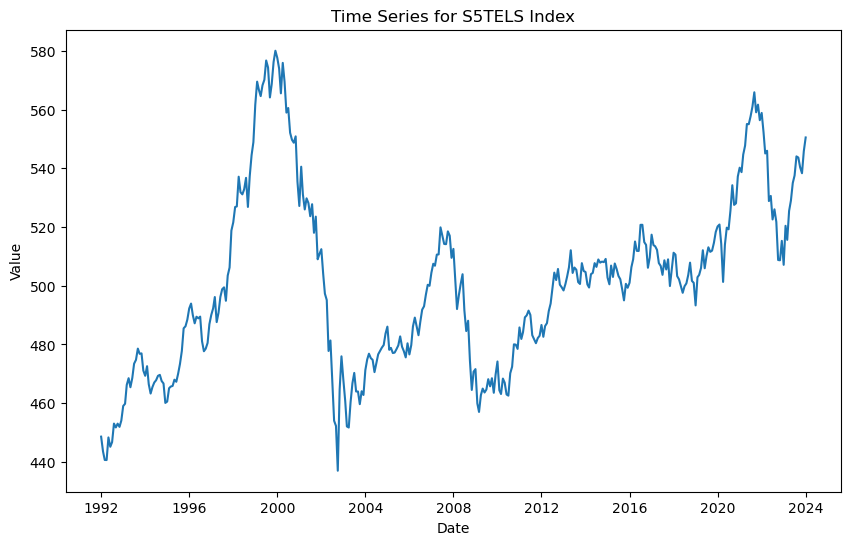

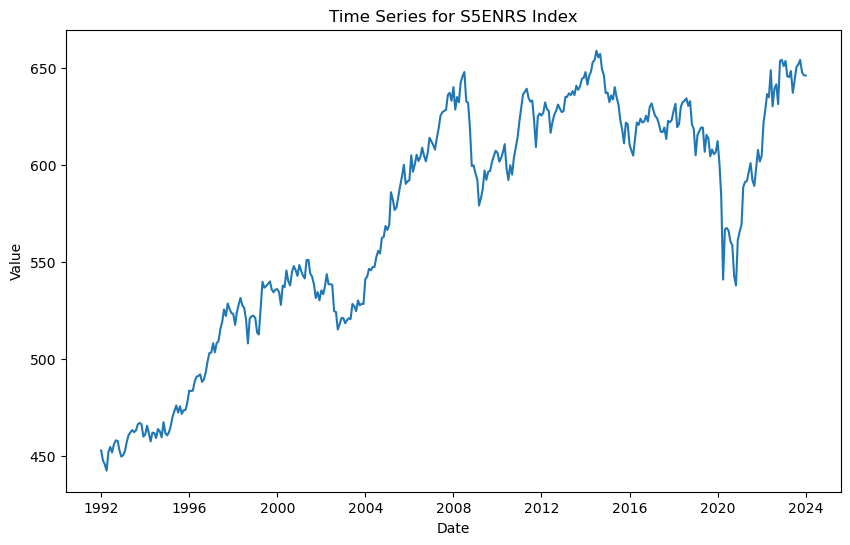

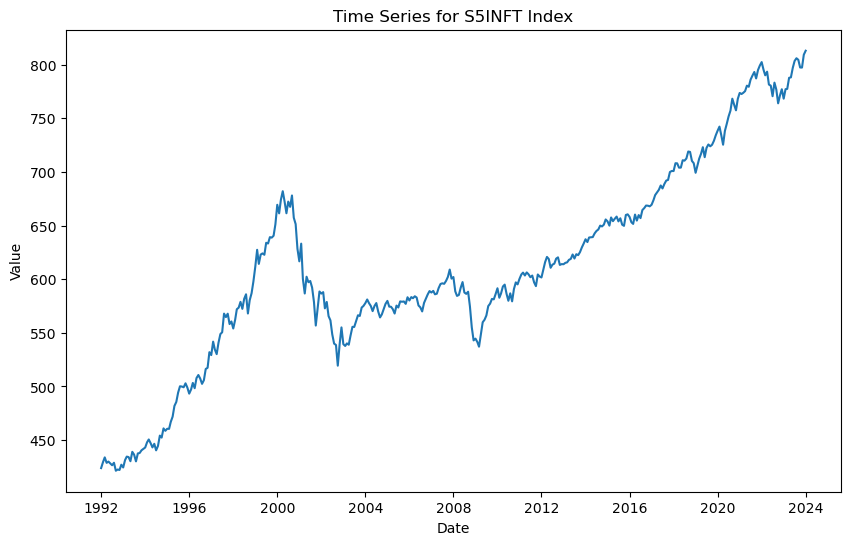

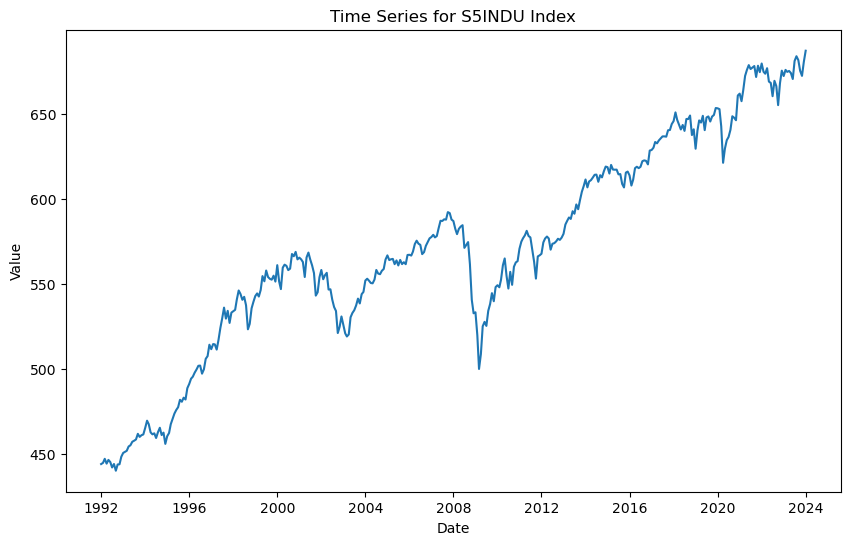

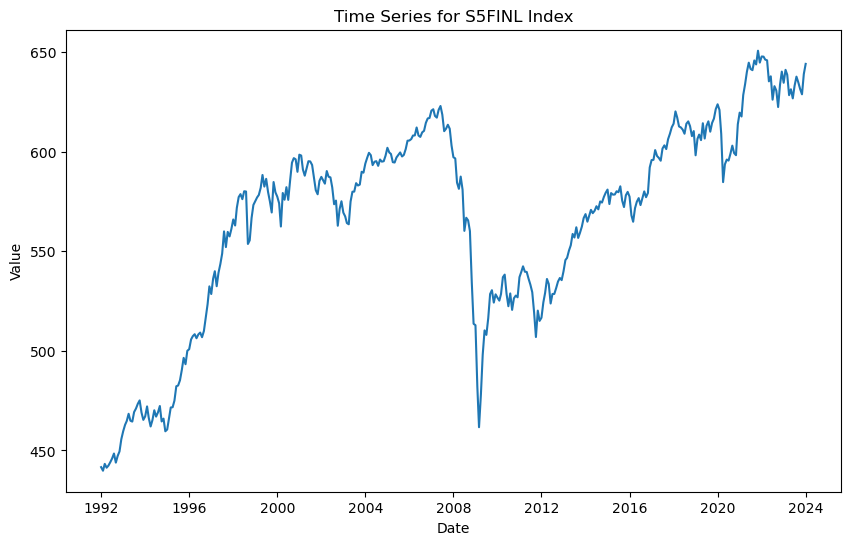

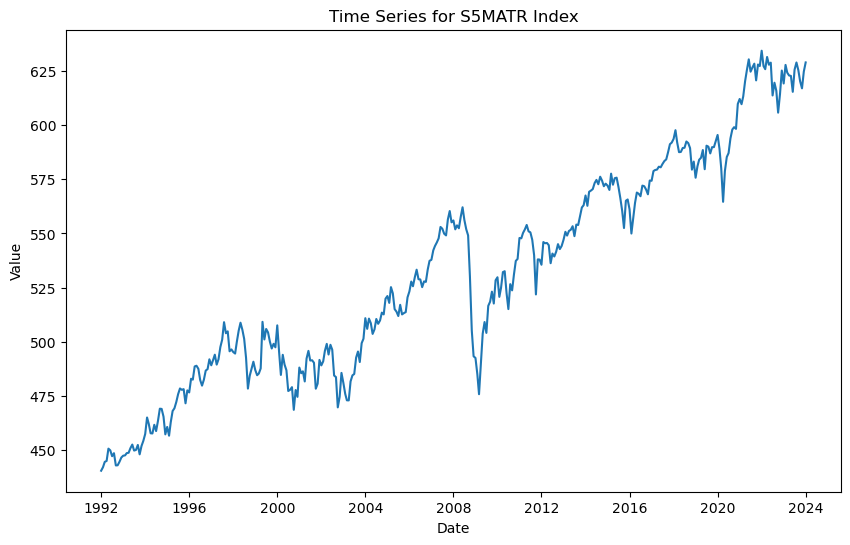

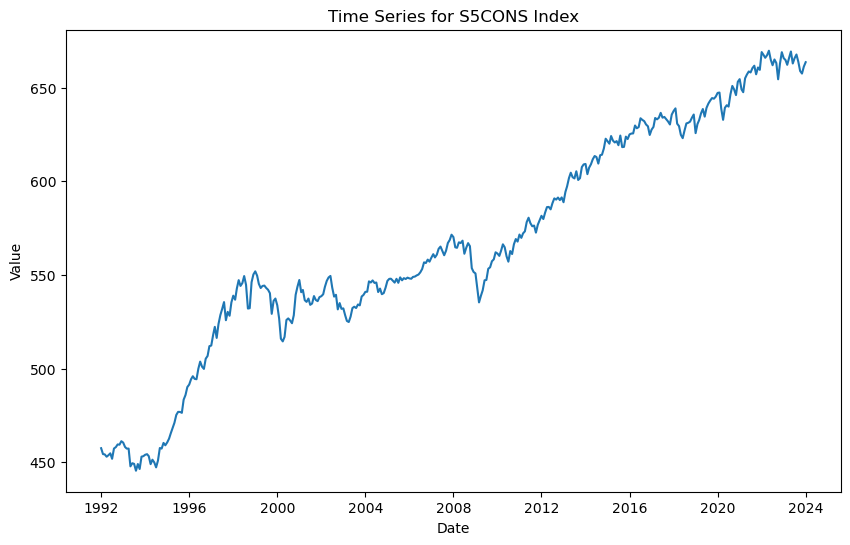

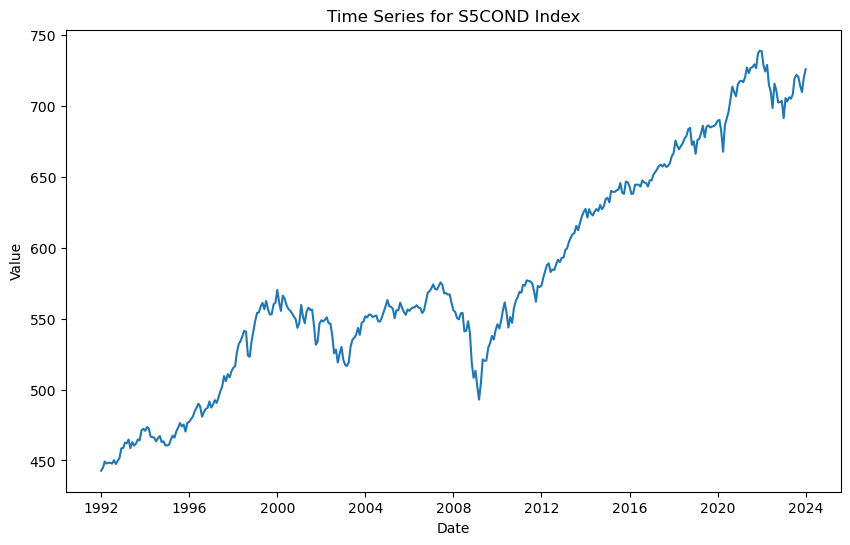

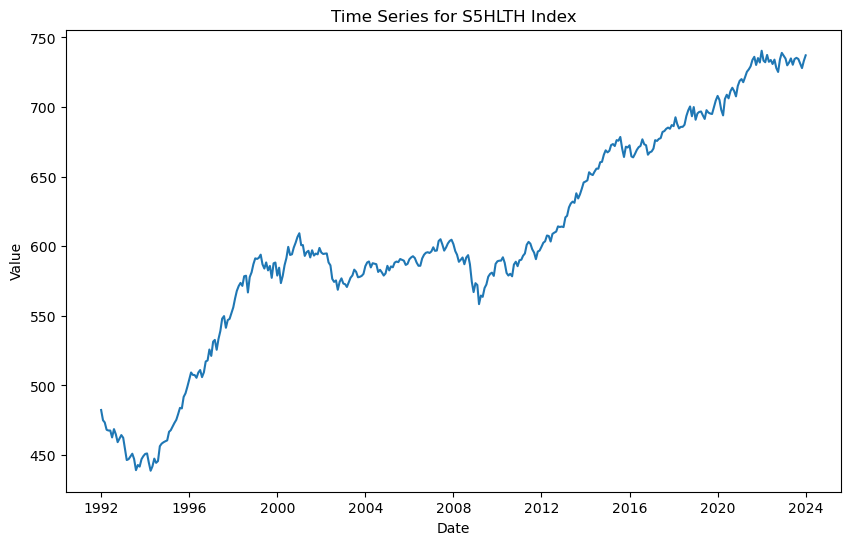

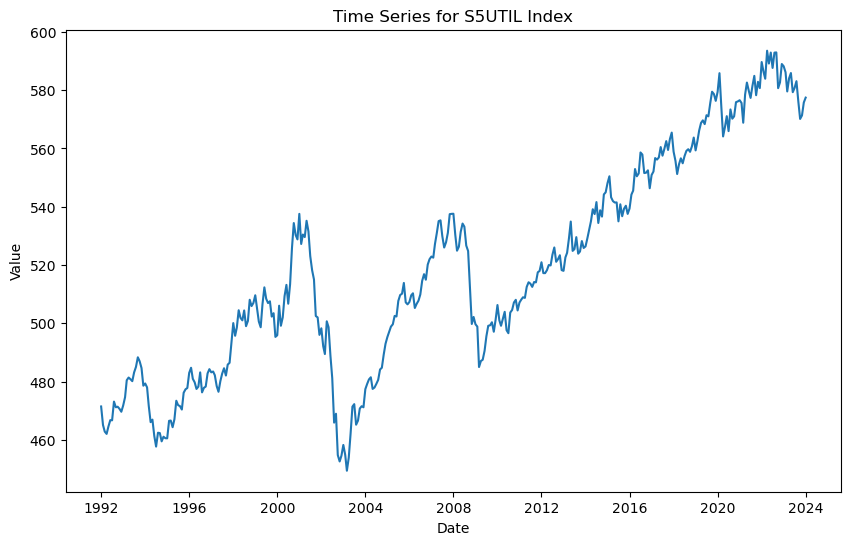

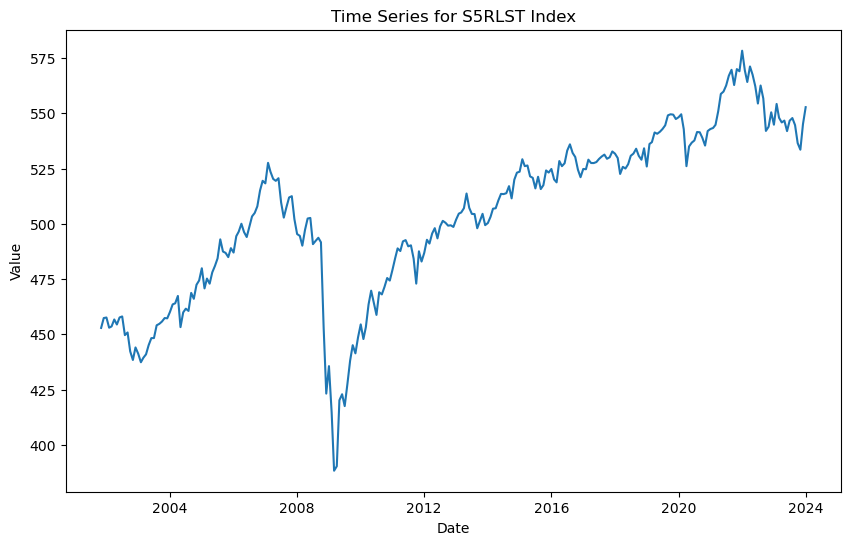

In [22]:
data = pd.read_excel('data/Source Data.xlsx', sheet_name='Condensed (final) data', engine='openpyxl')
#display(data)

industrynames = [col for col in data.columns if col.startswith('S5')]

industry_dfs = {}
for industry in industrynames:
    industry_data = data[['Date', 'Futures Shock', 'SPX Shock', '1Y Treasury', industry, 'GDP', 'PCEPI', 'Credit Spread']].copy()
    industry_data.set_index('Date', inplace=True)
    industry_data.loc[:, 'GDP'] = industry_data['GDP'] / industry_data['PCEPI']
    non_stationary_cols = check_stationarity(industry_data, industry_data.columns)
    for col in non_stationary_cols:
        if col != '1Y Treasury':
            industry_data.loc[:, col] = np.log(industry_data[col]) * 100
    industry_dfs[industry] = industry_data
    
    industry_data['year'] =industry_data.index.year
    industry_data['month'] =industry_data.index.month
        
    cols =industry_data.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    industry_data =industry_data[cols]
    
    industry_data.columns = ['year', 'month', 'ff4_hf', 'sp500_hf', 'gs1', 'logsp500', 'us_rgdp', 'us_gdpdef', 'ebpnew']
    
    industry_data.to_csv(f'data/industry_data/VARdata_{industry}.csv', index=False)

# Assuming industry_dfs is your dictionary of dataframes
for industry, df in industry_dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df[industry])
    plt.title(f'Time Series for {industry}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()
    
    
    